**Actividad PBL 4: Arboles de decisión**

Autores:


*   Daniel Makoszay Castañón       - A01750046
*   Santiago Jiménez Pasillas      - A01749907
*   Santiago Palavicini Saldívar   - A01749103
*   Ximena Serna Mendoza           - A01749870
*   Guillermo Ian Barbosa Martínez - A01747926


# **Modelo hecho por el equipo**

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('/content/titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
titanic = titanic.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1)
titanic.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [4]:
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [6]:
titanic = titanic.dropna()

In [7]:
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare','Embarked']
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Basic Decision Tree (Entrenamiento):

Accuracy           : 0.8441
Precision          : 0.8877
Recall             : 0.7094
F1-score           : 0.7886
Log loss           : 5.6180
AUC-ROC            : 0.8235
Mean squared error : 0.1559

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       337
           1       0.89      0.71      0.79       234

    accuracy                           0.84       571
   macro avg       0.86      0.82      0.83       571
weighted avg       0.85      0.84      0.84       571
 



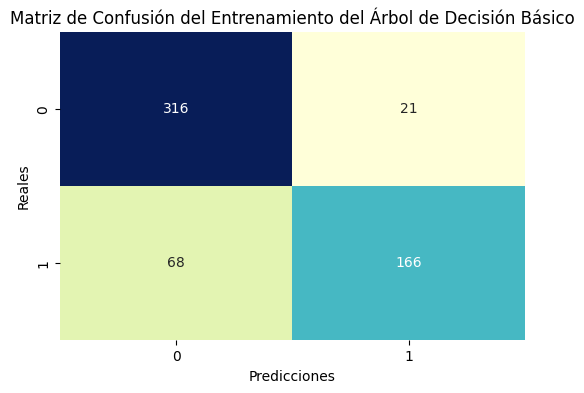

In [8]:
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dec_tree.fit(X_train, y_train)

#   Predicción con datos de entrenamiento
dec_pred_train = dec_tree.predict(X_train)

print("Basic Decision Tree (Entrenamiento):\n")
print(f"Accuracy           : {accuracy_score(y_train, dec_pred_train):.4f}")
print(f"Precision          : {precision_score(y_train, dec_pred_train):.4f}")
print(f"Recall             : {recall_score(y_train, dec_pred_train):.4f}")
print(f"F1-score           : {f1_score(y_train, dec_pred_train):.4f}")
print(f"Log loss           : {log_loss(y_train, dec_pred_train):.4f}")
print(f"AUC-ROC            : {roc_auc_score(y_train, dec_pred_train):.4f}")
print(f"Mean squared error : {mean_squared_error(y_train, dec_pred_train):.4f}\n")
print(classification_report(y_train, dec_pred_train), '\n')

conf_matrix = confusion_matrix(y_train, dec_pred_train)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión del Entrenamiento del Árbol de Decisión Básico")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

Basic Decision Tree (Entrenamiento):

Accuracy           : 0.7762
Precision          : 0.7727
Recall             : 0.6071
F1-score           : 0.6800
Log loss           : 8.0657
AUC-ROC            : 0.7461
Mean squared error : 0.2238

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        87
           1       0.77      0.61      0.68        56

    accuracy                           0.78       143
   macro avg       0.78      0.75      0.75       143
weighted avg       0.78      0.78      0.77       143
 



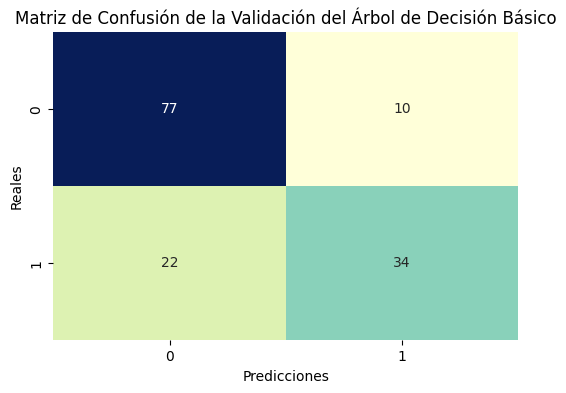

In [9]:
#   Predicción con datos de prueba
dec_pred_test = dec_tree.predict(X_test)

print("Basic Decision Tree (Entrenamiento):\n")
print(f"Accuracy           : {accuracy_score(y_test, dec_pred_test):.4f}")
print(f"Precision          : {precision_score(y_test, dec_pred_test):.4f}")
print(f"Recall             : {recall_score(y_test, dec_pred_test):.4f}")
print(f"F1-score           : {f1_score(y_test, dec_pred_test):.4f}")
print(f"Log loss           : {log_loss(y_test, dec_pred_test):.4f}")
print(f"AUC-ROC            : {roc_auc_score(y_test, dec_pred_test):.4f}")
print(f"Mean squared error : {mean_squared_error(y_test, dec_pred_test):.4f}\n")
print(classification_report(y_test, dec_pred_test), '\n')

conf_matrix = confusion_matrix(y_test, dec_pred_test)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión de la Validación del Árbol de Decisión Básico")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

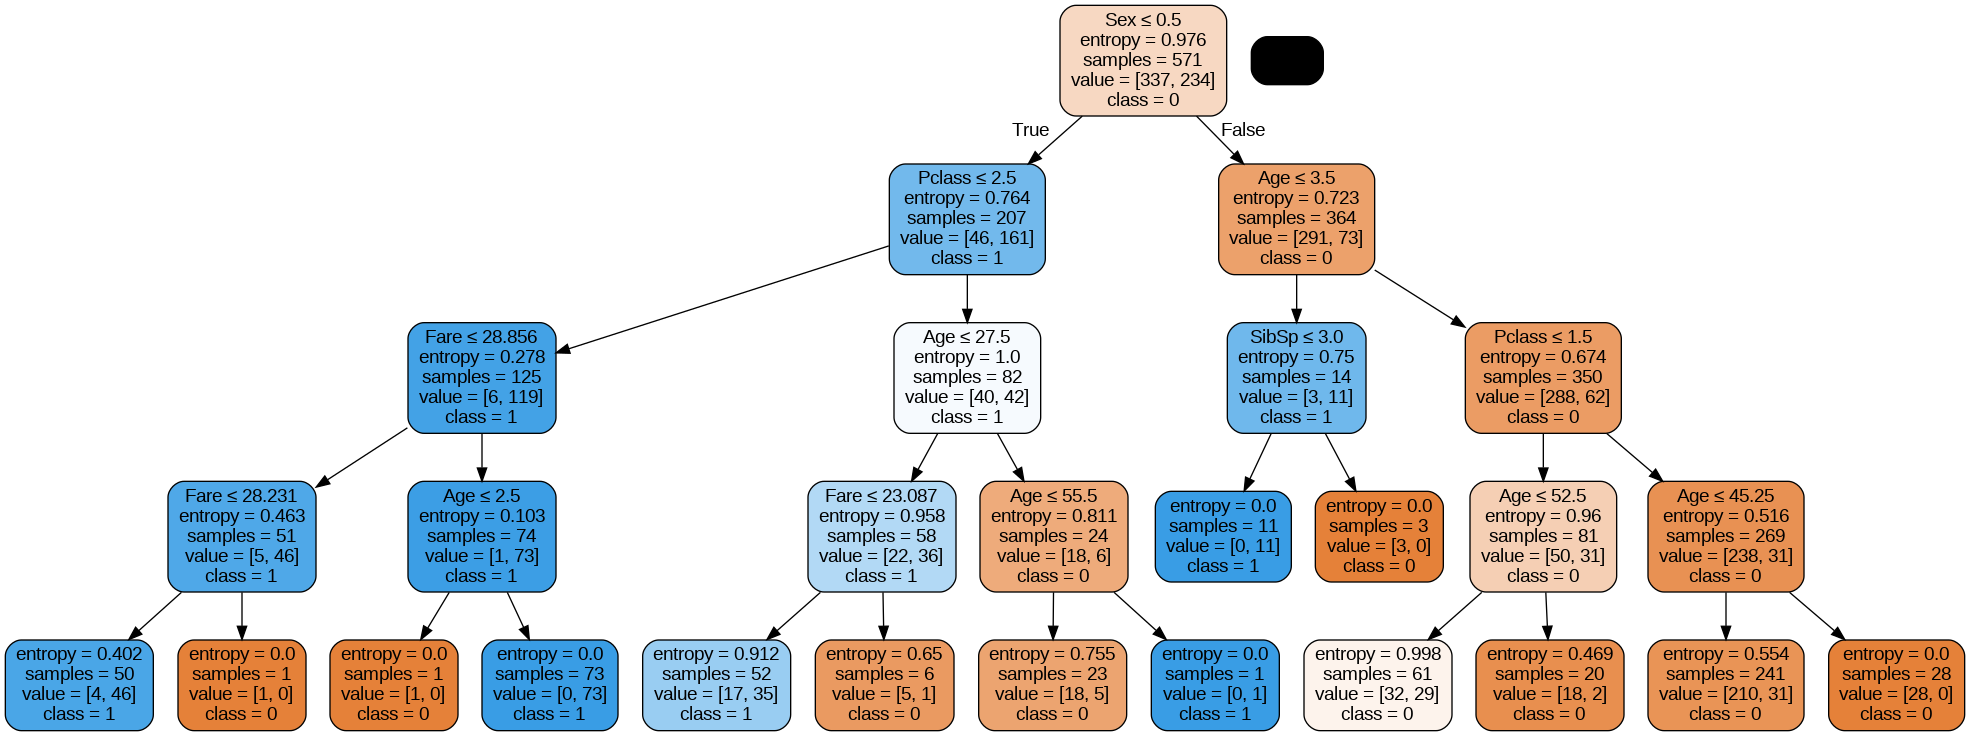

In [10]:
dot_data = StringIO()
export_graphviz(dec_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('basic_decision_tree.png')
Image(graph.create_png())

# **Modelos hechos por Watson**

## **Random Forest**

Random Forest (Entrenamiento):

Accuracy           : 0.9912
Precision          : 0.9914
Recall             : 0.9872
F1-score           : 0.9893
Log loss           : 0.3156
AUC-ROC            : 0.9906
Mean squared error : 0.0088

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       337
           1       0.99      0.99      0.99       234

    accuracy                           0.99       571
   macro avg       0.99      0.99      0.99       571
weighted avg       0.99      0.99      0.99       571
 



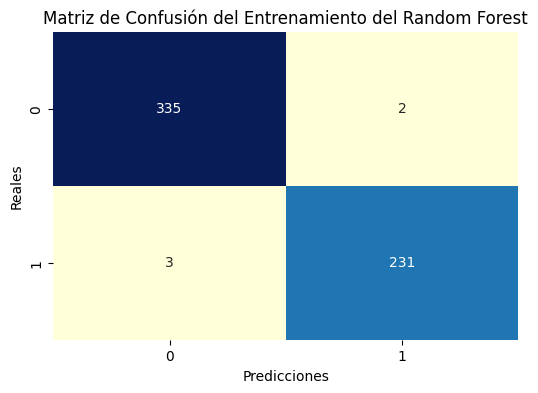

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training data
rf_pred_train = rf_model.predict(X_train)

print("Random Forest (Entrenamiento):\n")
print(f"Accuracy           : {accuracy_score(y_train, rf_pred_train):.4f}")
print(f"Precision          : {precision_score(y_train, rf_pred_train):.4f}")
print(f"Recall             : {recall_score(y_train, rf_pred_train):.4f}")
print(f"F1-score           : {f1_score(y_train, rf_pred_train):.4f}")
print(f"Log loss           : {log_loss(y_train, rf_pred_train):.4f}")
print(f"AUC-ROC            : {roc_auc_score(y_train, rf_pred_train):.4f}")
print(f"Mean squared error : {mean_squared_error(y_train, rf_pred_train):.4f}\n")
print(classification_report(y_train, rf_pred_train), '\n')

conf_matrix = confusion_matrix(y_train, rf_pred_train)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión del Entrenamiento del Random Forest")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

Random Forest (Prueba):

Accuracy           : 0.7692
Precision          : 0.7170
Recall             : 0.6786
F1-score           : 0.6972
Log loss           : 8.3178
AUC-ROC            : 0.7531
Mean squared error : 0.2308

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        87
           1       0.72      0.68      0.70        56

    accuracy                           0.77       143
   macro avg       0.76      0.75      0.76       143
weighted avg       0.77      0.77      0.77       143
 



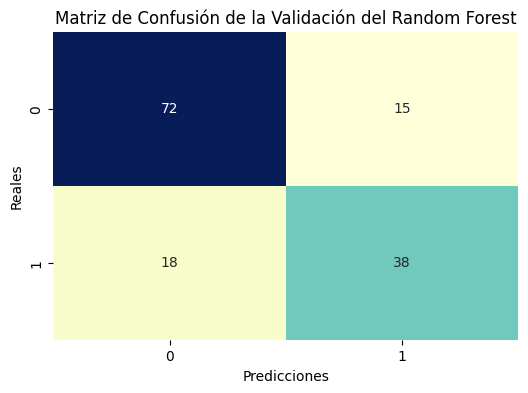

In [12]:
# Make predictions on the testing data
rf_pred_test = rf_model.predict(X_test)

print("Random Forest (Prueba):\n")
print(f"Accuracy           : {accuracy_score(y_test, rf_pred_test):.4f}")
print(f"Precision          : {precision_score(y_test, rf_pred_test):.4f}")
print(f"Recall             : {recall_score(y_test, rf_pred_test):.4f}")
print(f"F1-score           : {f1_score(y_test, rf_pred_test):.4f}")
print(f"Log loss           : {log_loss(y_test, rf_pred_test):.4f}")
print(f"AUC-ROC            : {roc_auc_score(y_test, rf_pred_test):.4f}")
print(f"Mean squared error : {mean_squared_error(y_test, rf_pred_test):.4f}\n")
print(classification_report(y_test, rf_pred_test), '\n')

conf_matrix = confusion_matrix(y_test, rf_pred_test)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión de la Validación del Random Forest")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

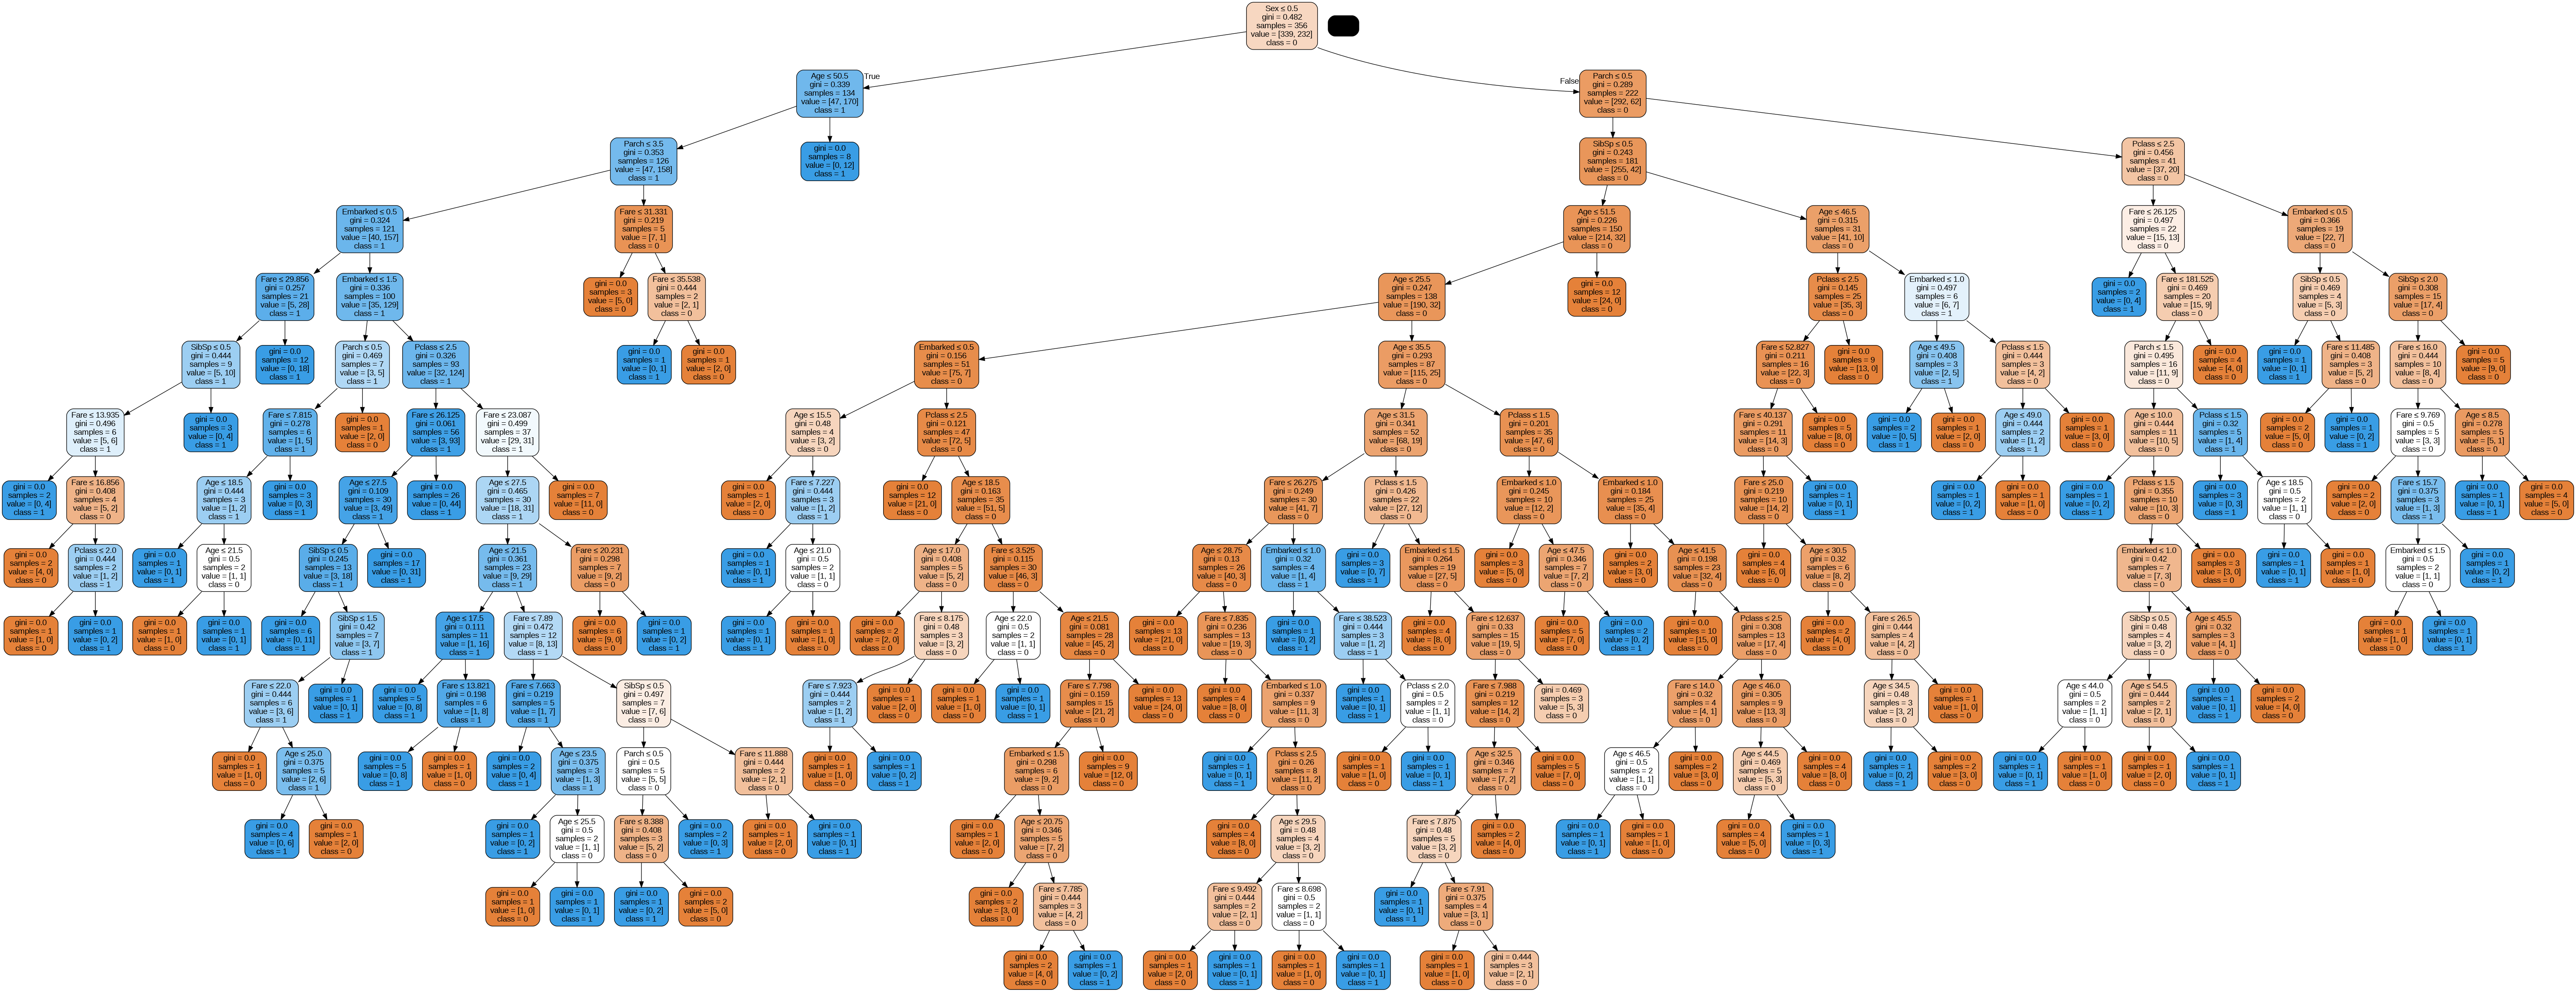

In [13]:
dot_data = StringIO()
export_graphviz(rf_model.estimators_[0], out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('random_forest.png')
Image(graph.create_png())

## **Gradient Boosting**

Gradient Boosting (Entrenamiento):

Accuracy           : 0.9177
Precision          : 0.9474
Recall             : 0.8462
F1-score           : 0.8939
Log loss           : 2.9668
AUC-ROC            : 0.9068
Mean squared error : 0.0823

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       337
           1       0.95      0.85      0.89       234

    accuracy                           0.92       571
   macro avg       0.92      0.91      0.91       571
weighted avg       0.92      0.92      0.92       571
 



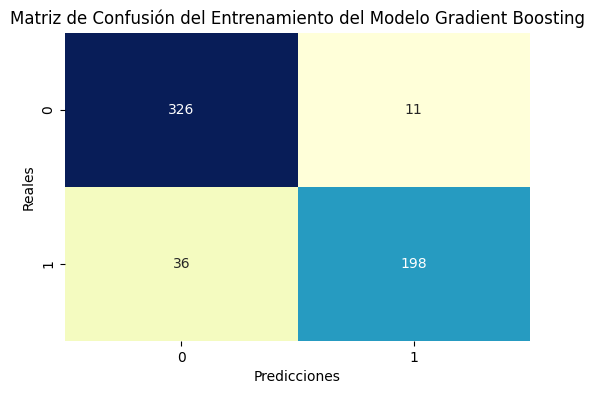

In [14]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the training data
gb_pred_train = gb_model.predict(X_train)

print("Gradient Boosting (Entrenamiento):\n")
print(f"Accuracy           : {accuracy_score(y_train, gb_pred_train):.4f}")
print(f"Precision          : {precision_score(y_train, gb_pred_train):.4f}")
print(f"Recall             : {recall_score(y_train, gb_pred_train):.4f}")
print(f"F1-score           : {f1_score(y_train, gb_pred_train):.4f}")
print(f"Log loss           : {log_loss(y_train, gb_pred_train):.4f}")
print(f"AUC-ROC            : {roc_auc_score(y_train, gb_pred_train):.4f}")
print(f"Mean squared error : {mean_squared_error(y_train, gb_pred_train):.4f}\n")
print(classification_report(y_train, gb_pred_train), '\n')

conf_matrix = confusion_matrix(y_train, gb_pred_train)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión del Entrenamiento del Modelo Gradient Boosting")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

Gradient Boosting (Prueba):

Accuracy           : 0.7762
Precision          : 0.7308
Recall             : 0.6786
F1-score           : 0.7037
Log loss           : 8.0657
AUC-ROC            : 0.7588
Mean squared error : 0.2238

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        87
           1       0.73      0.68      0.70        56

    accuracy                           0.78       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.78      0.77       143
 



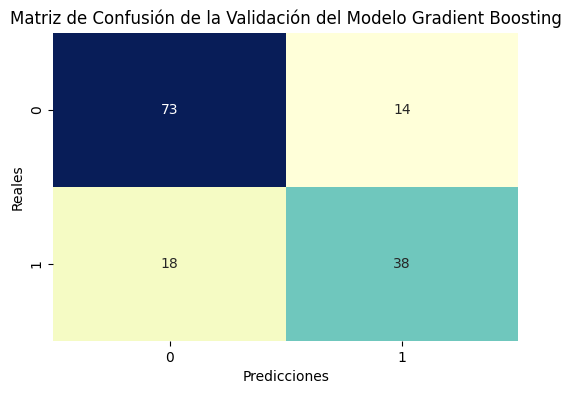

In [15]:
# Make predictions on the testing data
gb_pred_test = gb_model.predict(X_test)

print("Gradient Boosting (Prueba):\n")
print(f"Accuracy           : {accuracy_score(y_test, gb_pred_test):.4f}")
print(f"Precision          : {precision_score(y_test, gb_pred_test):.4f}")
print(f"Recall             : {recall_score(y_test, gb_pred_test):.4f}")
print(f"F1-score           : {f1_score(y_test, gb_pred_test):.4f}")
print(f"Log loss           : {log_loss(y_test, gb_pred_test):.4f}")
print(f"AUC-ROC            : {roc_auc_score(y_test, gb_pred_test):.4f}")
print(f"Mean squared error : {mean_squared_error(y_test, gb_pred_test):.4f}\n")
print(classification_report(y_test, gb_pred_test), '\n')

conf_matrix = confusion_matrix(y_test, gb_pred_test)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión de la Validación del Modelo Gradient Boosting")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

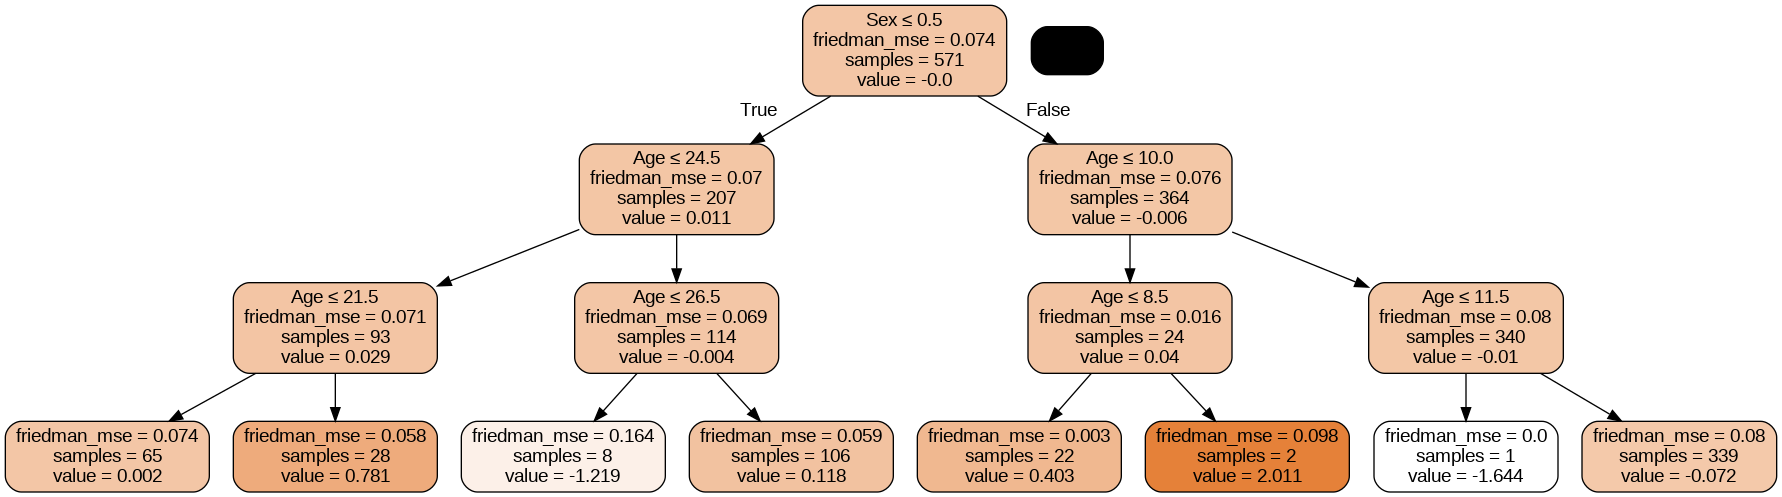

In [20]:
# Graficación de un árbol aleatorio
import random
random_tree = gb_model.estimators_[random.randint(0, len(gb_model.estimators_) - 1), 0]

dot_data = StringIO()
export_graphviz(
    random_tree,
    out_file=dot_data, filled=True, rounded=True,
    special_characters=True,
    feature_names = feature_cols, class_names=['0','1']
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('gradient_boosting.png')
Image(graph.create_png())

## **XGBoost**

XG Boost (Entrenamiento):

Accuracy           : 0.9842
Precision          : 0.9956
Recall             : 0.9658
F1-score           : 0.9805
Log loss           : 0.5681
AUC-ROC            : 0.9814
Mean squared error : 0.0158

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       337
           1       1.00      0.97      0.98       234

    accuracy                           0.98       571
   macro avg       0.99      0.98      0.98       571
weighted avg       0.98      0.98      0.98       571
 



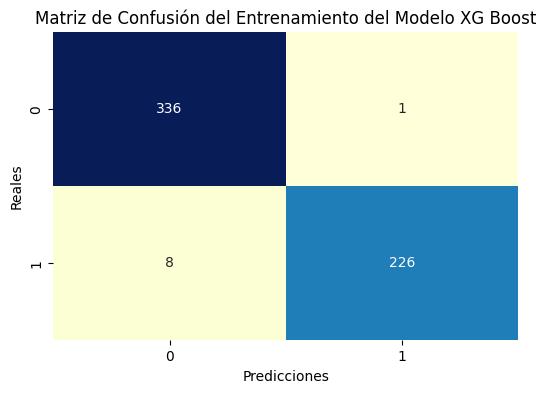

In [21]:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training data
xgb_pred_train = xgb_model.predict(X_train)

print("XG Boost (Entrenamiento):\n")
print(f"Accuracy           : {accuracy_score(y_train, xgb_pred_train):.4f}")
print(f"Precision          : {precision_score(y_train, xgb_pred_train):.4f}")
print(f"Recall             : {recall_score(y_train, xgb_pred_train):.4f}")
print(f"F1-score           : {f1_score(y_train, xgb_pred_train):.4f}")
print(f"Log loss           : {log_loss(y_train, xgb_pred_train):.4f}")
print(f"AUC-ROC            : {roc_auc_score(y_train, xgb_pred_train):.4f}")
print(f"Mean squared error : {mean_squared_error(y_train, xgb_pred_train):.4f}\n")
print(classification_report(y_train, xgb_pred_train), '\n')

conf_matrix = confusion_matrix(y_train, xgb_pred_train)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión del Entrenamiento del Modelo XG Boost")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

XG Boost (Prueba):

Accuracy           : 0.7972
Precision          : 0.7647
Recall             : 0.6964
F1-score           : 0.7290
Log loss           : 7.3096
AUC-ROC            : 0.7792
Mean squared error : 0.2028

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        87
           1       0.76      0.70      0.73        56

    accuracy                           0.80       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.80      0.80      0.80       143
 



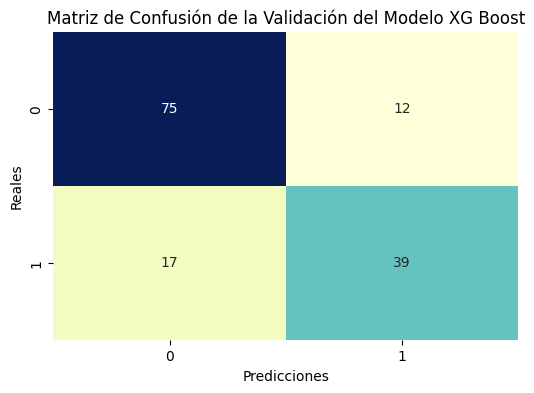

In [22]:
# Make predictions on the testing data
xgb_pred_test = xgb_model.predict(X_test)

print("XG Boost (Prueba):\n")
print(f"Accuracy           : {accuracy_score(y_test, xgb_pred_test):.4f}")
print(f"Precision          : {precision_score(y_test, xgb_pred_test):.4f}")
print(f"Recall             : {recall_score(y_test, xgb_pred_test):.4f}")
print(f"F1-score           : {f1_score(y_test, xgb_pred_test):.4f}")
print(f"Log loss           : {log_loss(y_test, xgb_pred_test):.4f}")
print(f"AUC-ROC            : {roc_auc_score(y_test, xgb_pred_test):.4f}")
print(f"Mean squared error : {mean_squared_error(y_test, xgb_pred_test):.4f}\n")
print(classification_report(y_test, xgb_pred_test), '\n')

conf_matrix = confusion_matrix(y_test, xgb_pred_test)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión de la Validación del Modelo XG Boost")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

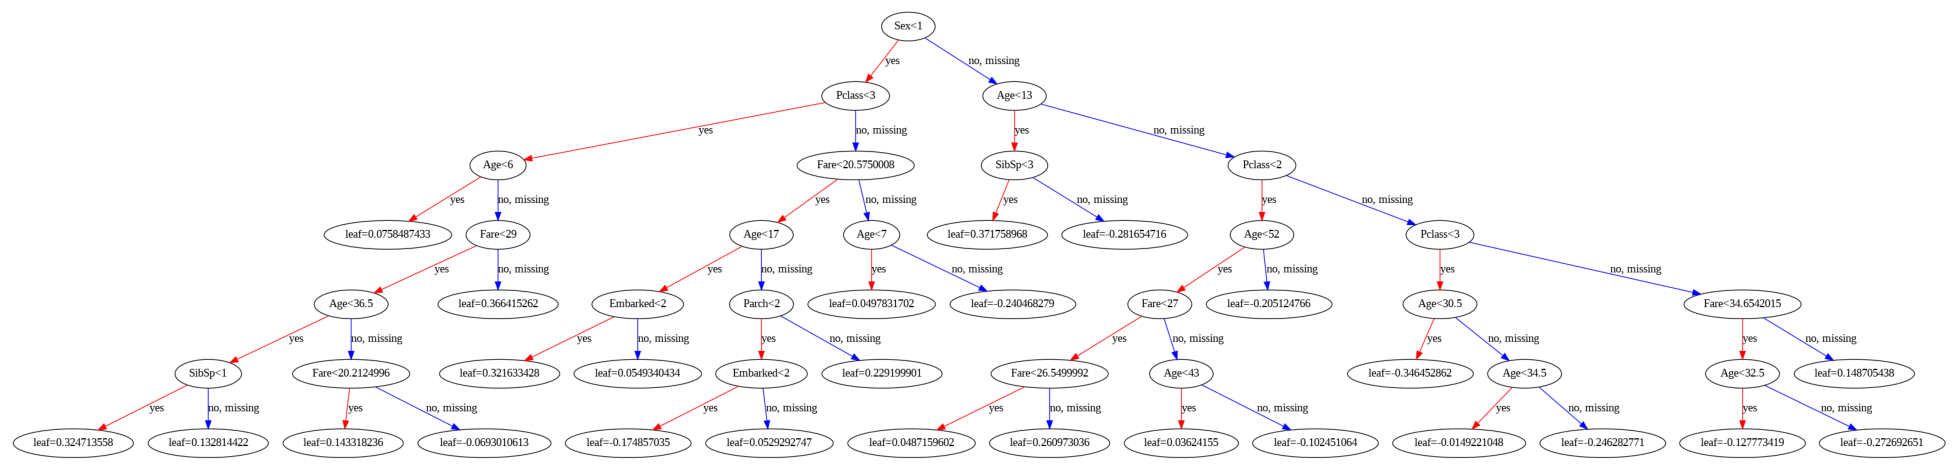

In [23]:
# Graficamos 3 árboles del modelo XG Boost
fig, ax = plt.subplots(figsize=(25, 20))
xgb.plot_tree(xgb_model, num_trees=3, ax=ax)
plt.savefig("xg_boost.png")
plt.show()

## **LGBM Classifier**

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 234, number of negative: 337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.409807 -> initscore=-0.364762
[LightGBM] [Info] Start training from score -0.364762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


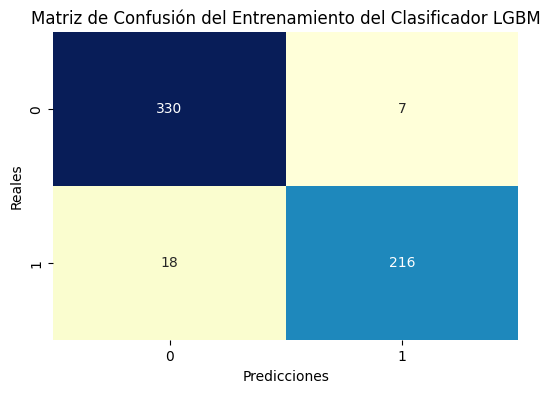

In [24]:
import lightgbm as lgb

# Create an LGBM Classifier model
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the training data
lgb_pred_train = lgb_model.predict(X_train)

print("LGBM Classifier (Entrenamiento):\n")
print(f"Accuracy           : {accuracy_score(y_train, lgb_pred_train):.4f}")
print(f"Precision          : {precision_score(y_train, lgb_pred_train):.4f}")
print(f"Recall             : {recall_score(y_train, lgb_pred_train):.4f}")
print(f"F1-score           : {f1_score(y_train, lgb_pred_train):.4f}")
print(f"Log loss           : {log_loss(y_train, lgb_pred_train):.4f}")
print(f"AUC-ROC            : {roc_auc_score(y_train, lgb_pred_train):.4f}")
print(f"Mean squared error : {mean_squared_error(y_train, lgb_pred_train):.4f}\n")
print(classification_report(y_train, lgb_pred_train), '\n')

conf_matrix = confusion_matrix(y_train, lgb_pred_train)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión del Entrenamiento del Clasificador LGBM")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

LGBM Classifier (Prueba):

Accuracy           : 0.7902
Precision          : 0.7500
Recall             : 0.6964
F1-score           : 0.7222
Log loss           : 7.5616
AUC-ROC            : 0.7735
Mean squared error : 0.2098

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        87
           1       0.75      0.70      0.72        56

    accuracy                           0.79       143
   macro avg       0.78      0.77      0.78       143
weighted avg       0.79      0.79      0.79       143
 



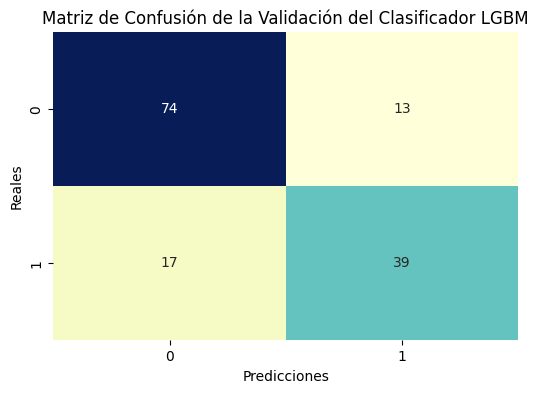

In [25]:
# Make predictions on the testing data
lgb_pred_test = lgb_model.predict(X_test)

print("LGBM Classifier (Prueba):\n")
print(f"Accuracy           : {accuracy_score(y_test, lgb_pred_test):.4f}")
print(f"Precision          : {precision_score(y_test, lgb_pred_test):.4f}")
print(f"Recall             : {recall_score(y_test, lgb_pred_test):.4f}")
print(f"F1-score           : {f1_score(y_test, lgb_pred_test):.4f}")
print(f"Log loss           : {log_loss(y_test, lgb_pred_test):.4f}")
print(f"AUC-ROC            : {roc_auc_score(y_test, lgb_pred_test):.4f}")
print(f"Mean squared error : {mean_squared_error(y_test, lgb_pred_test):.4f}\n")
print(classification_report(y_test, lgb_pred_test), '\n')

conf_matrix = confusion_matrix(y_test, lgb_pred_test)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión de la Validación del Clasificador LGBM")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

<Axes: >

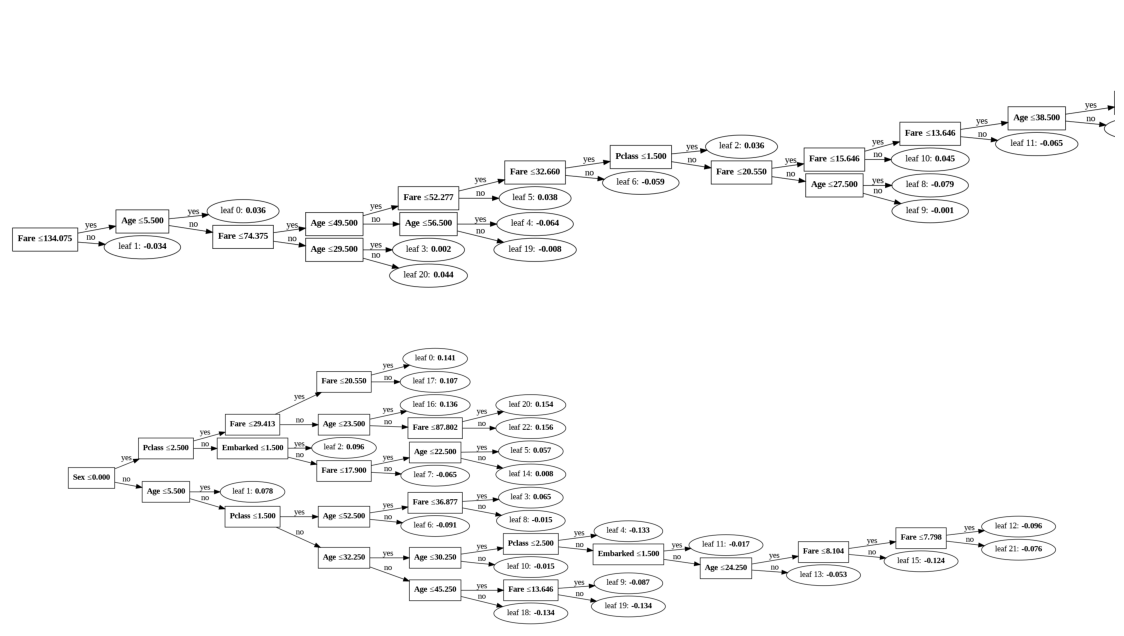

In [26]:
tree1 = random.randint(0, lgb_model.booster_.num_trees() - 1)
tree2 = random.randint(0, lgb_model.booster_.num_trees() - 1)

fig, ax = plt.subplots(nrows=2, figsize=(16,8), sharex=True)
lgb.plot_tree(lgb_model, tree_index=tree1, dpi=300, ax=ax[0])
lgb.plot_tree(lgb_model, tree_index=tree2, dpi=300, ax=ax[1])

## **Decision Tree Regressor**

Snap Decision Tree (Entrenamiento):

MSE      : 0.0050
MAE      : 0.0099
R^2      : 0.9795



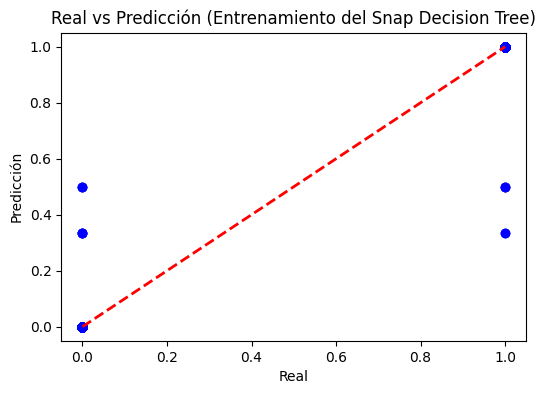

In [27]:
#from snapml import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Create a Decision Tree Regressor model
reg_model = DecisionTreeRegressor()

# Convert train and test data into an array
X_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)

X_test_arr = np.array(X_test)
y_test_arr = np.array(y_test)

# Train the model on the training data
reg_model.fit(X_train_arr, y_train_arr)

# Make predictions on the training data
reg_pred_train = reg_model.predict(X_train_arr)

print("Snap Decision Tree (Entrenamiento):\n")
print(f"MSE      : {mean_squared_error(y_train_arr, reg_pred_train):.4f}")
print(f"MAE      : {mean_absolute_error(y_train_arr, reg_pred_train):.4f}")
print(f"R^2      : {r2_score(y_train_arr, reg_pred_train):.4f}\n")

# Visualization: Plotting the predicted vs actual values
plt.figure(figsize=(6, 4))
plt.scatter(y_train_arr, reg_pred_train, color="blue")
plt.plot([y_train_arr.min(), y_train_arr.max()], [y_train_arr.min(), y_train_arr.max()], 'r--', lw=2)
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.title('Real vs Predicción (Entrenamiento del Snap Decision Tree)')
plt.show()

Snap Decision Tree (Entrenamiento):

MSE      : 0.2762
MAE      : 0.2797
R^2      : -0.1594



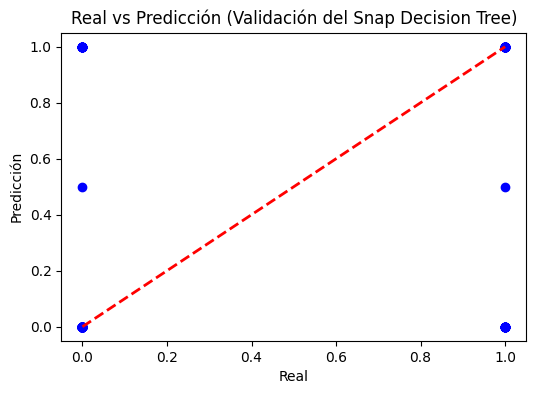

In [28]:
# Make predictions on the testing data
reg_pred_test = reg_model.predict(X_test_arr)

print("Snap Decision Tree (Entrenamiento):\n")
print(f"MSE      : {mean_squared_error(y_test_arr, reg_pred_test):.4f}")
print(f"MAE      : {mean_absolute_error(y_test_arr, reg_pred_test):.4f}")
print(f"R^2      : {r2_score(y_test_arr, reg_pred_test):.4f}\n")

# Visualization: Plotting the predicted vs actual values
plt.figure(figsize=(6, 4))
plt.scatter(y_test_arr, reg_pred_test, color="blue")
plt.plot([y_test_arr.min(), y_test_arr.max()], [y_test_arr.min(), y_test_arr.max()], 'r--', lw=2)
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.title('Real vs Predicción (Validación del Snap Decision Tree)')
plt.show()

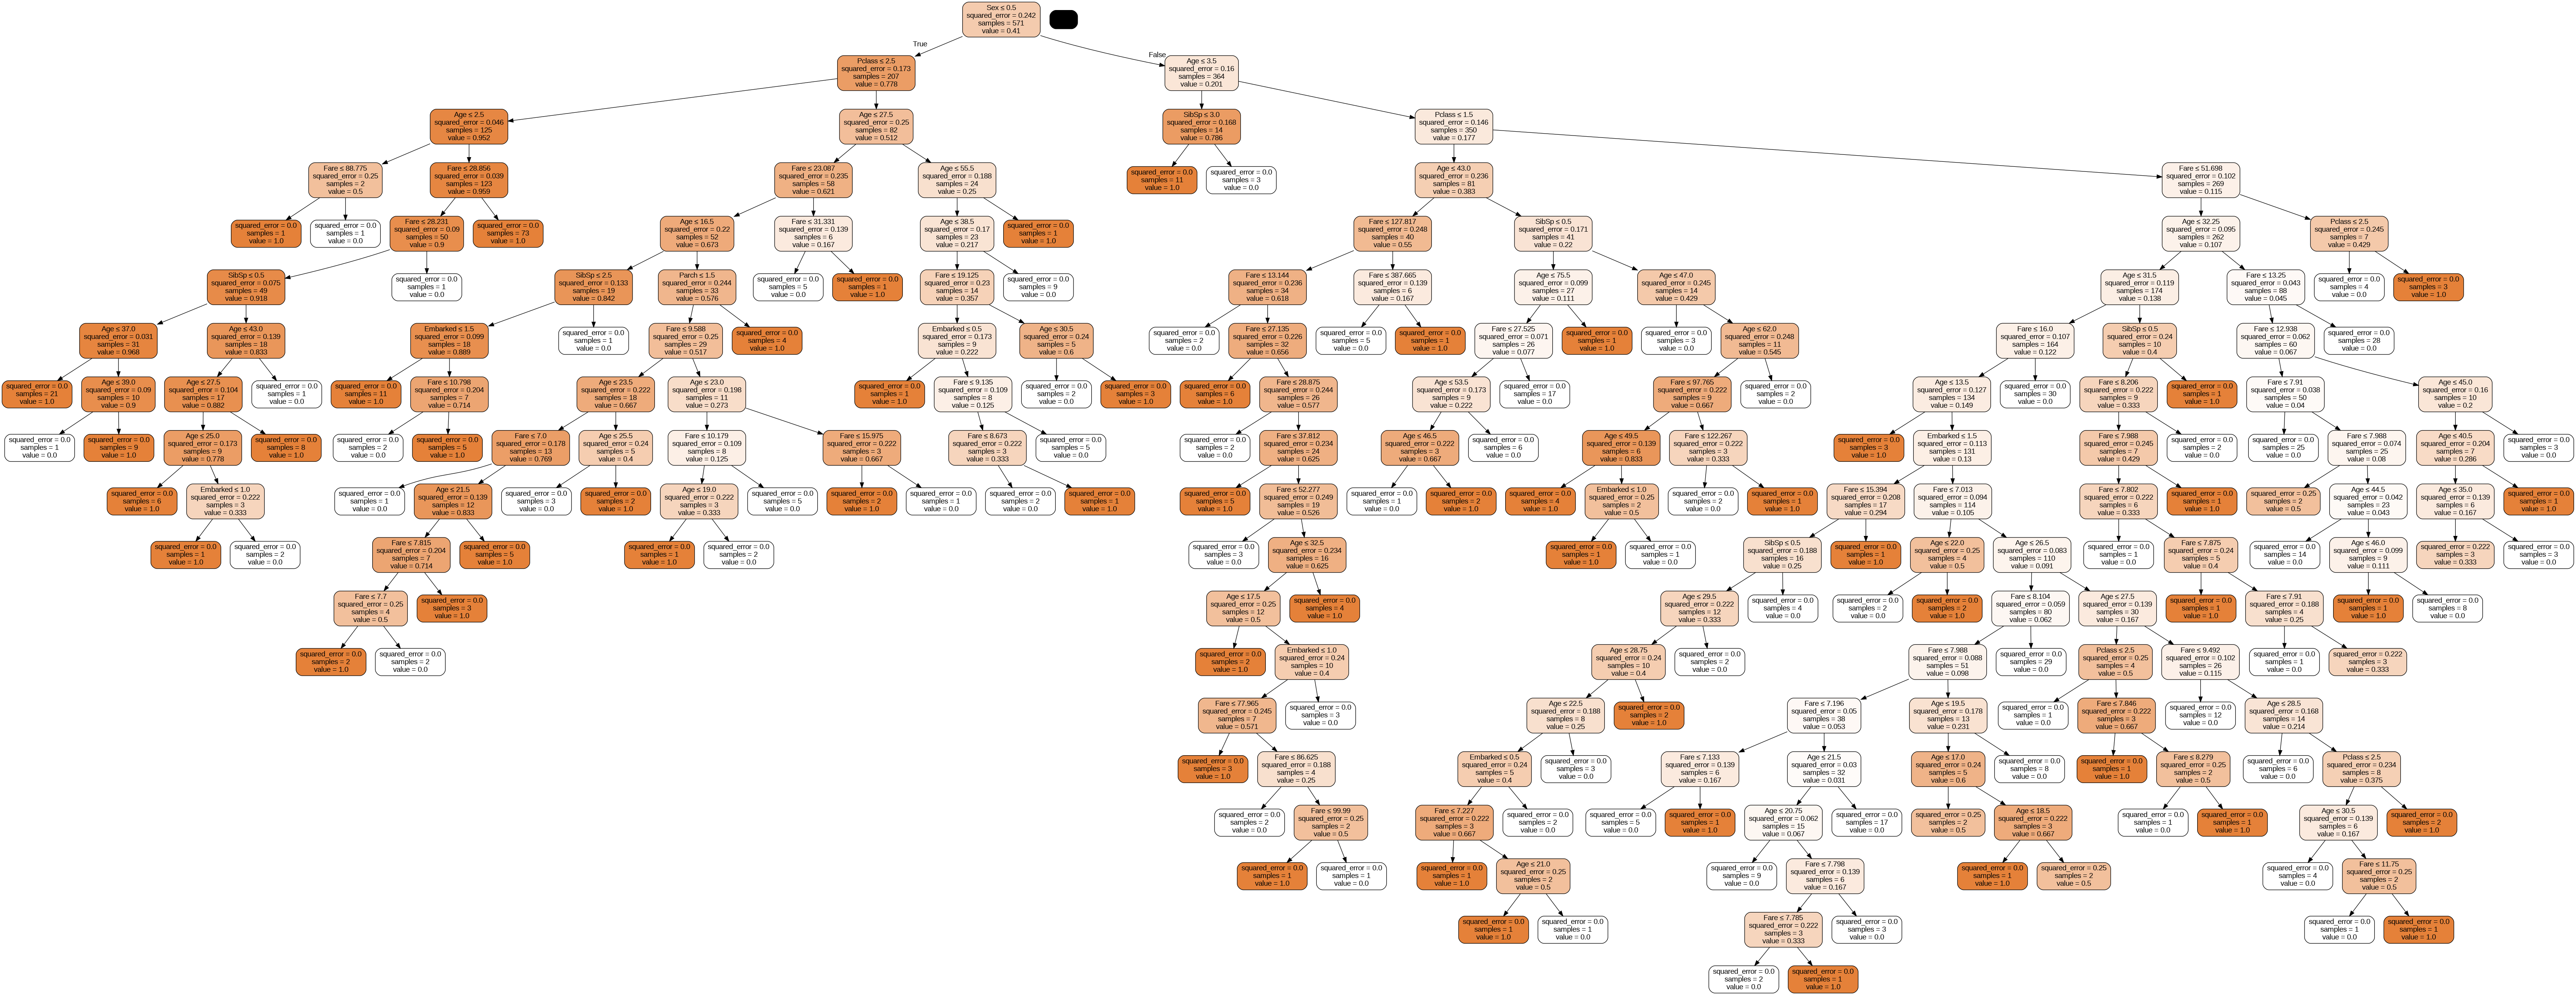

In [29]:
# Export the tree as DOT data
dot_data = StringIO()
export_graphviz(reg_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('regressor_tree.png')
Image(graph.create_png())